Plot histograms of MIC values for each antibiotic

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
import dotenv

# add the 'src' directory as one where we can import modules
project_dir = os.path.join(os.getcwd(), os.pardir)
src_dir = os.path.join(project_dir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport data.tools

# load env
%load_ext dotenv
dotenv_path = os.path.join(project_dir, '.env')
dotenv.load_dotenv(dotenv_path)

True

In [81]:
# Process and load data
input = os.path.join(os.environ['PRDATA'], 'external/AAC.02140-16_zac003175944sd1.csv')

_ = data.tools.process_metadata(input)
mic, micsign, meta, _ = data.tools.load_metadata()

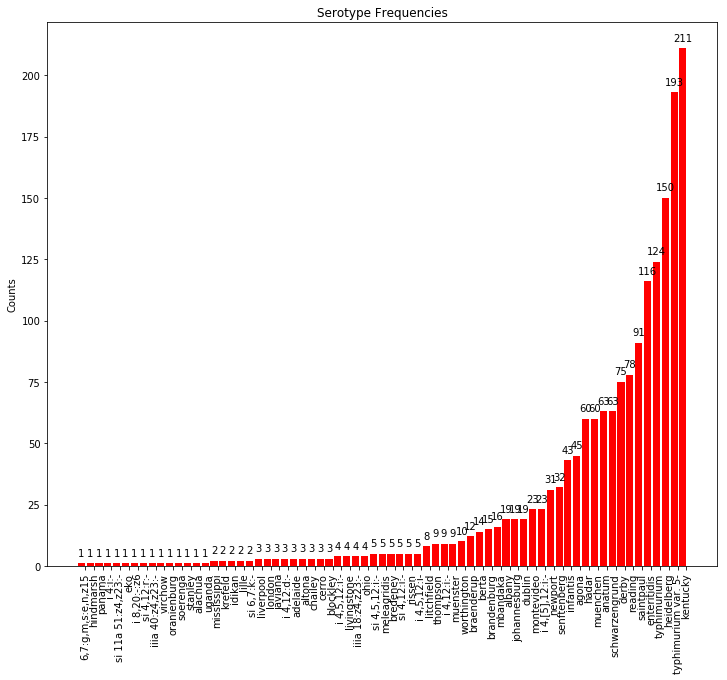

In [82]:
# Serotype distribution
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,10]

serotypes, counts = np.unique(meta['SEROTYPE'], return_counts=True)
sortedord = np.argsort(counts)
serotypes = serotypes[sortedord]
counts = counts[sortedord]
N = len(serotypes)

ind = np.arange(N)  # the x locations for the groups
width = 0.8       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='r')

ax.set_ylabel('Counts')
ax.set_title('Serotype Frequencies')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(serotypes)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    _, ymax = plt.ylim()
    bump = ymax * 0.01
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + bump,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

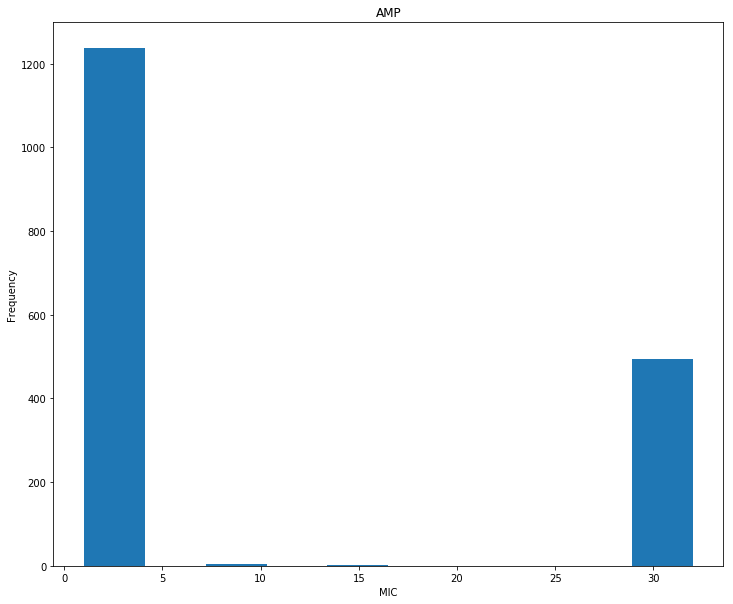

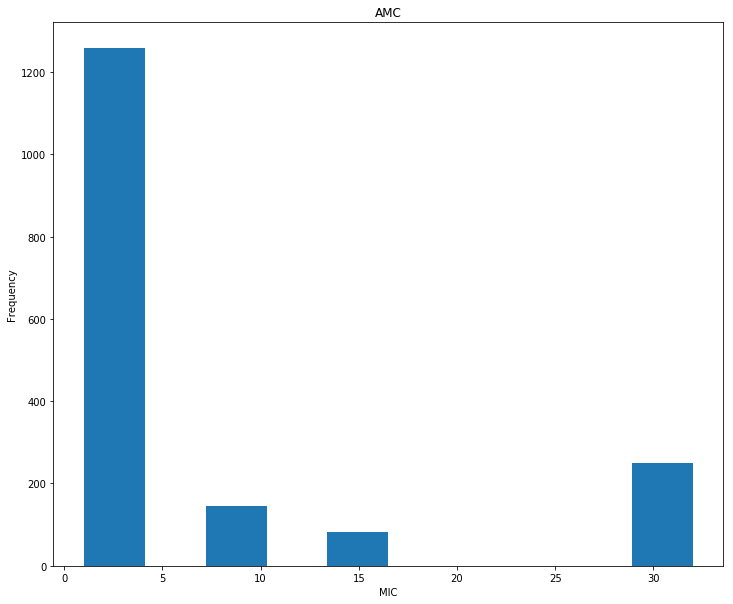

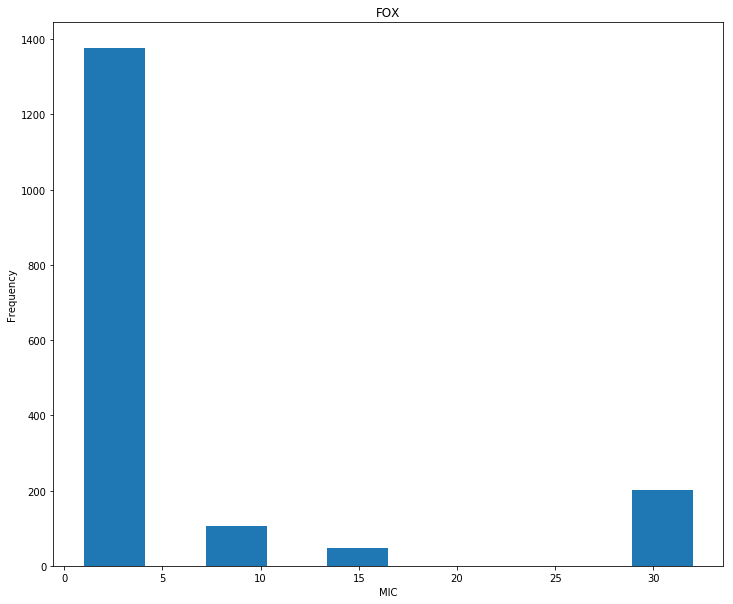

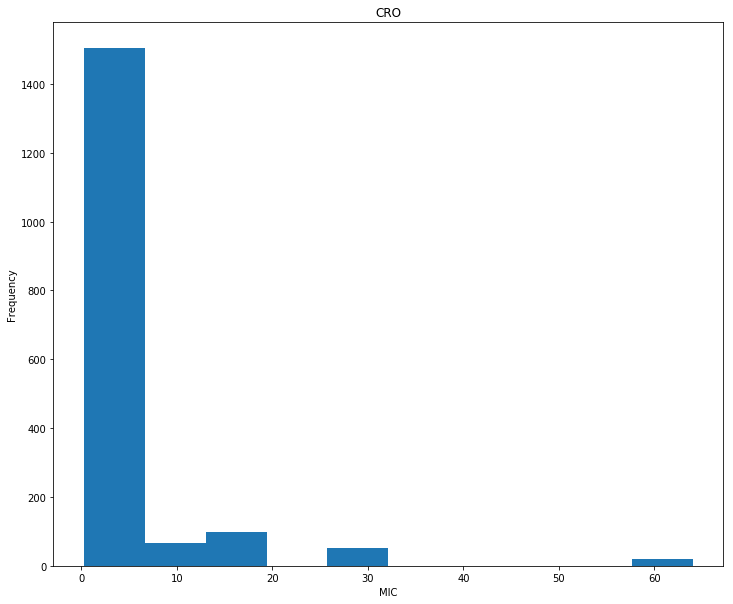

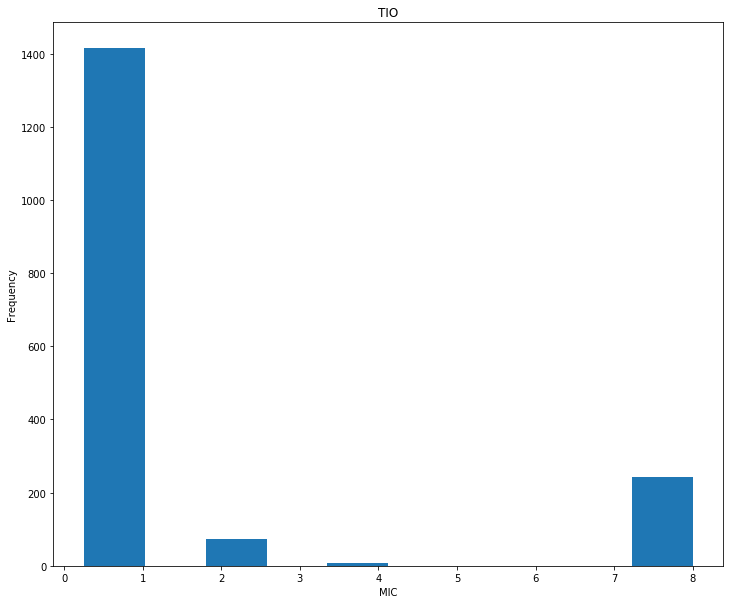

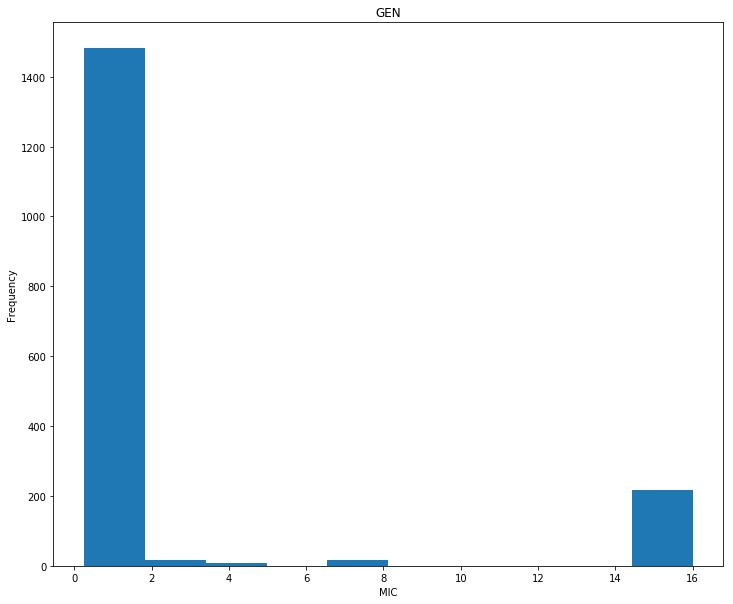

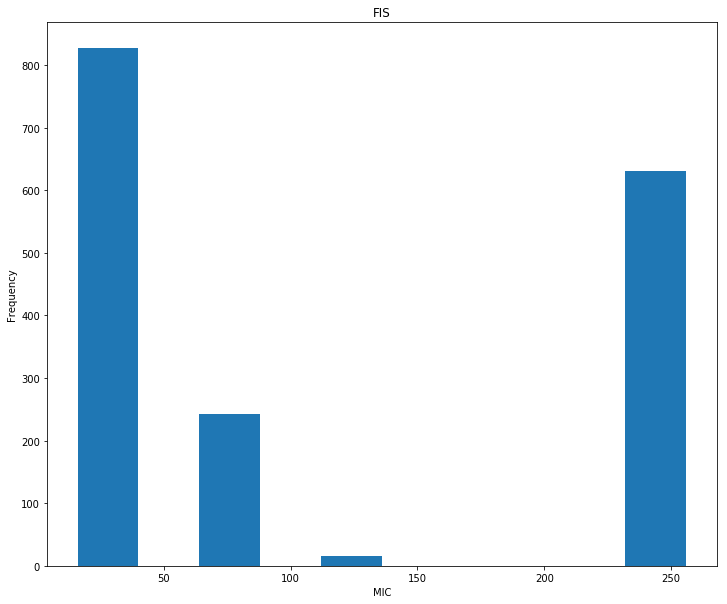

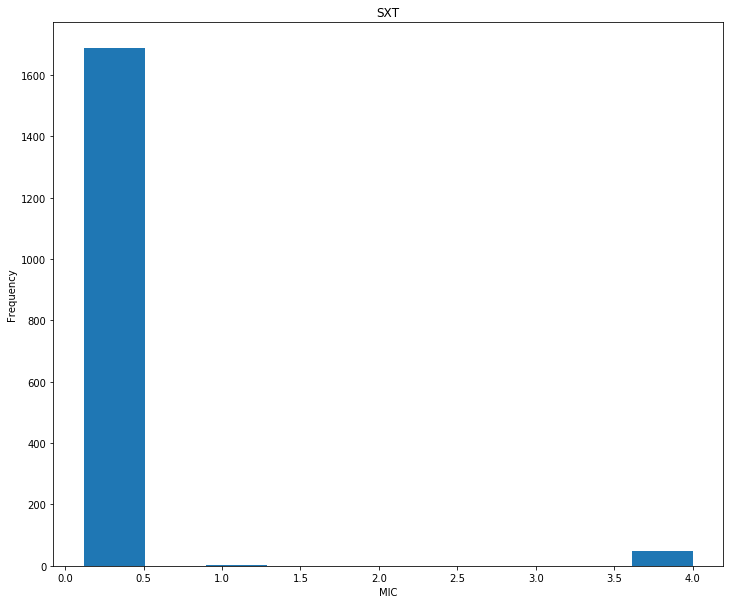

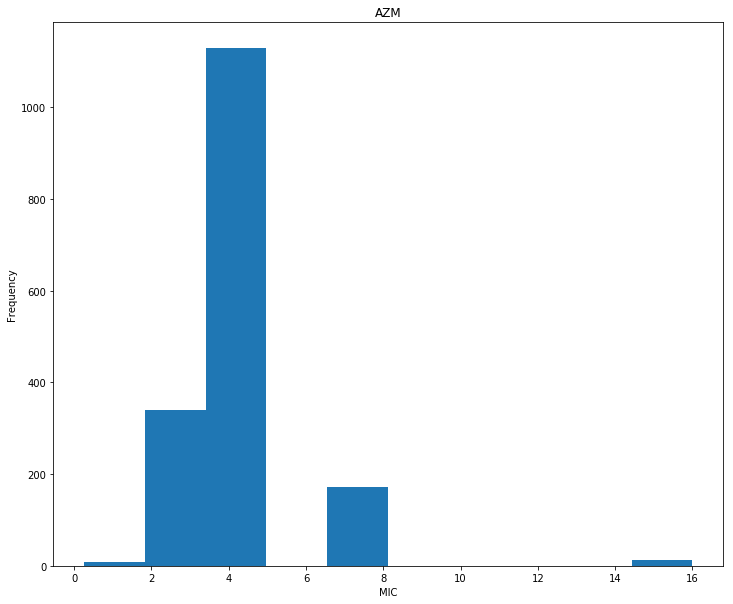

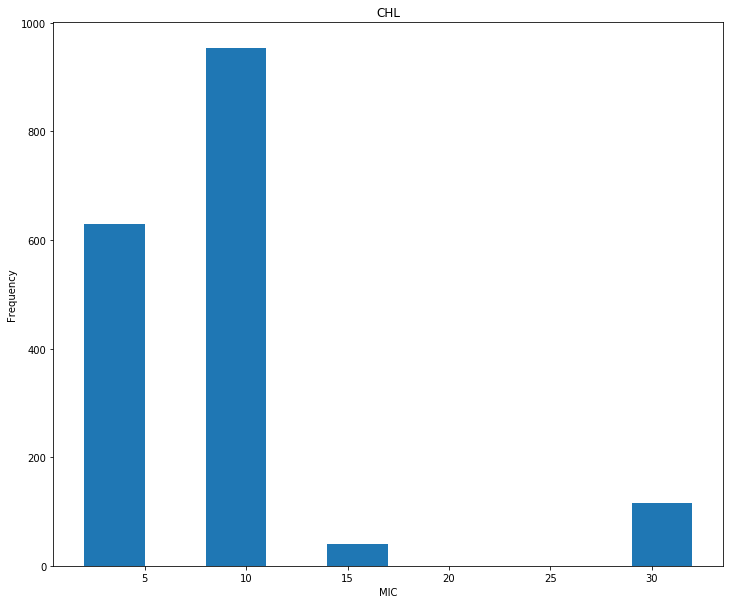

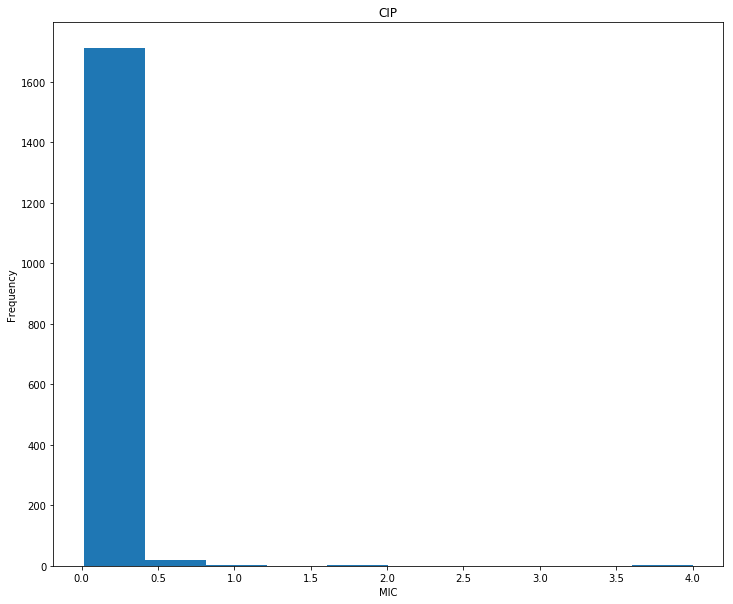

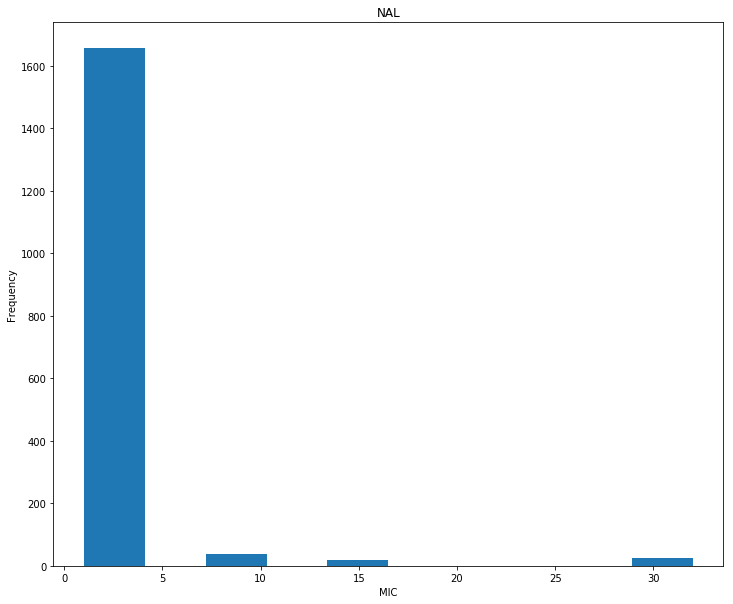

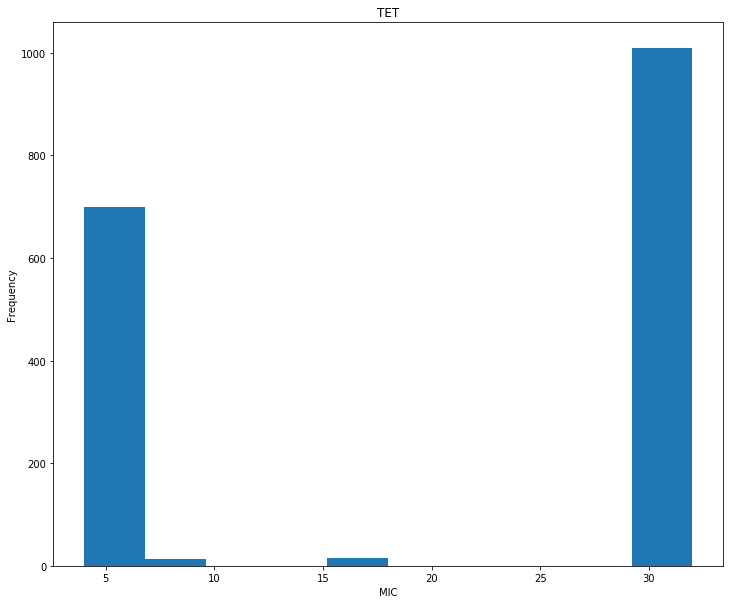

In [104]:
# MIC distributions
for drug in list(mic):
    tmp = mic[drug][~np.isnan(mic[drug])]
    plt.hist(tmp)
    plt.title(drug)
    plt.xlabel("MIC")
    plt.ylabel("Frequency")
    plt.show()

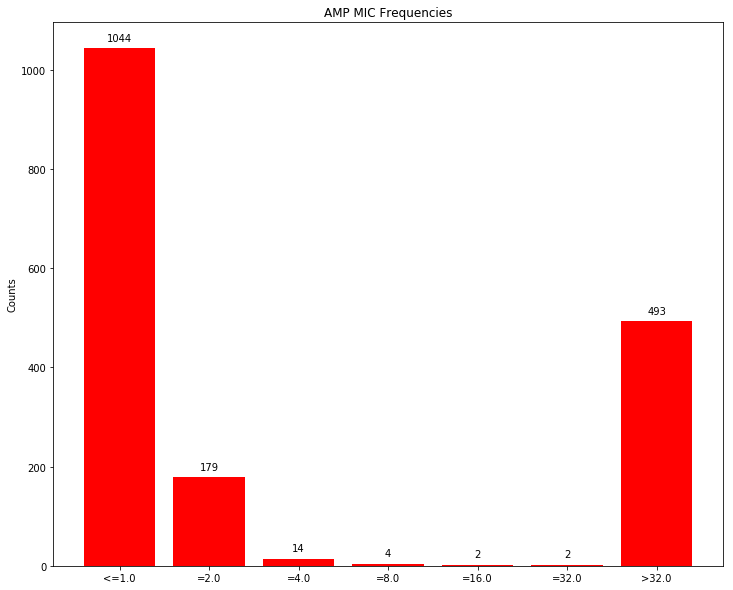

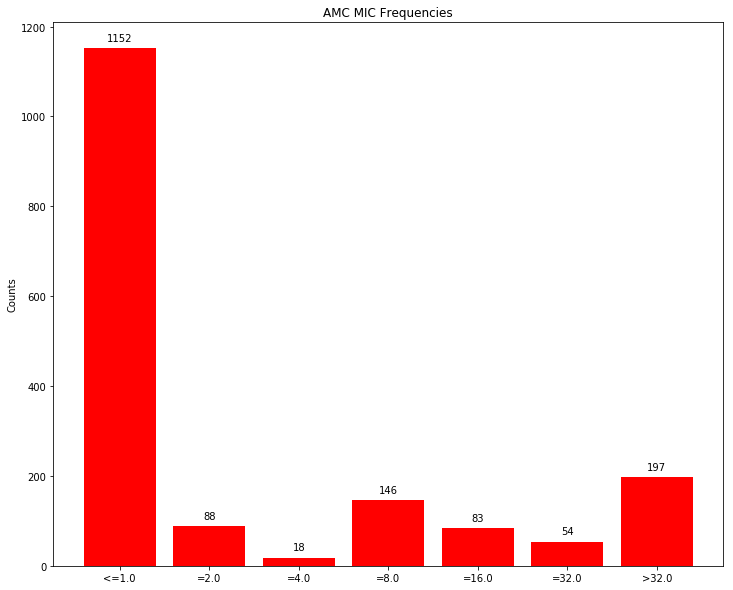

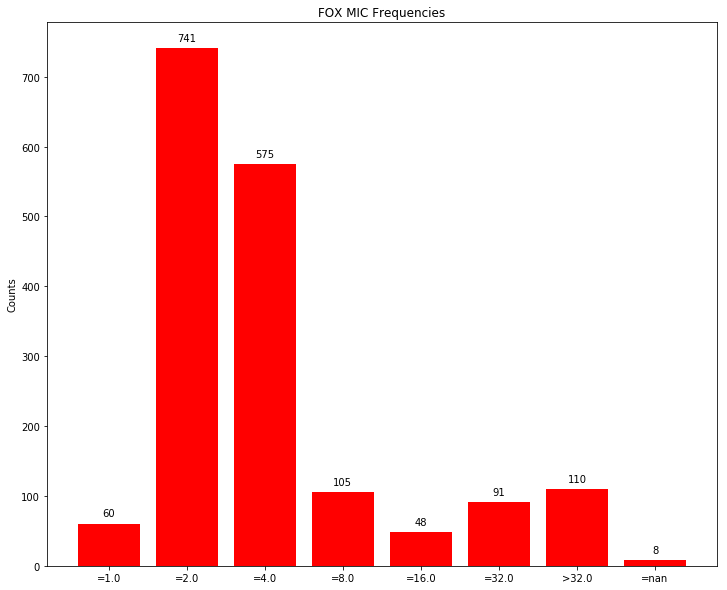

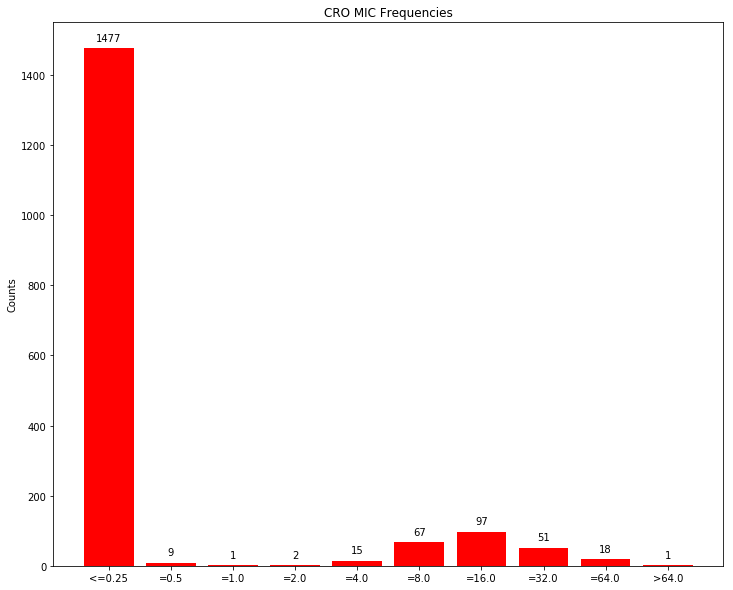

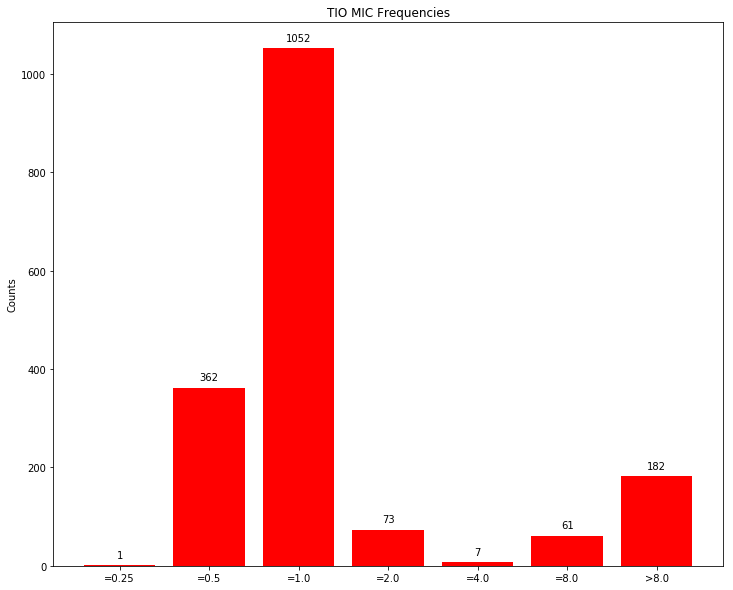

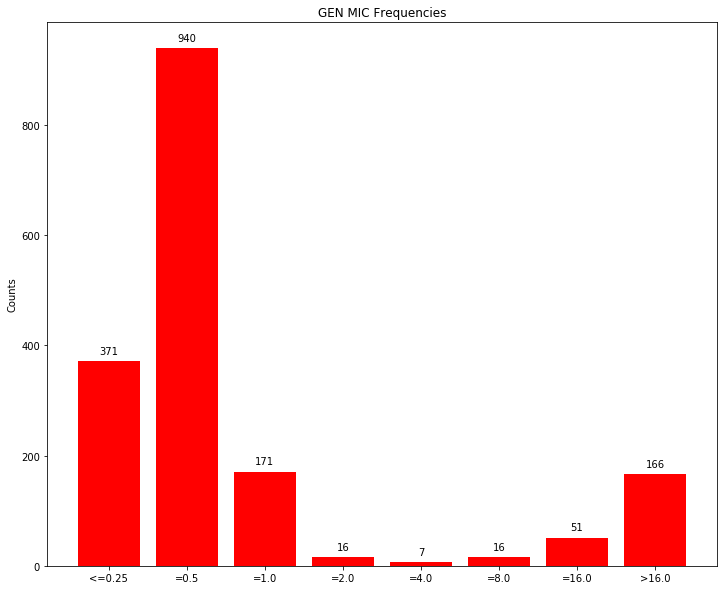

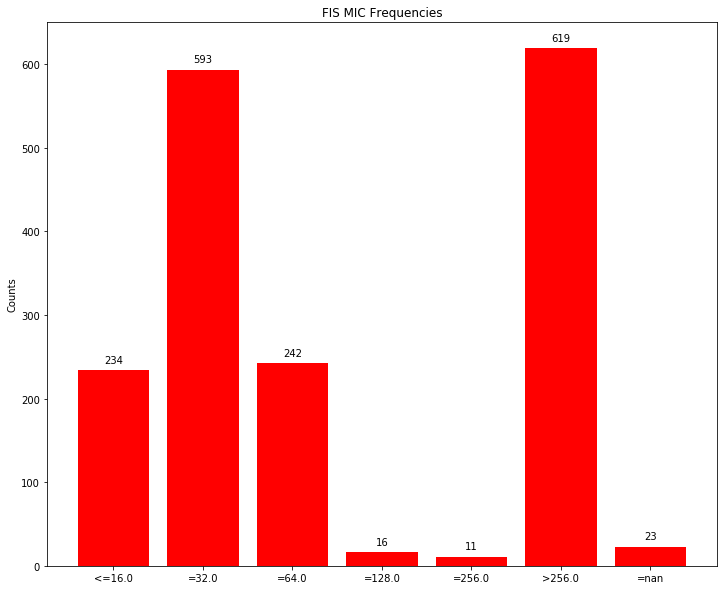

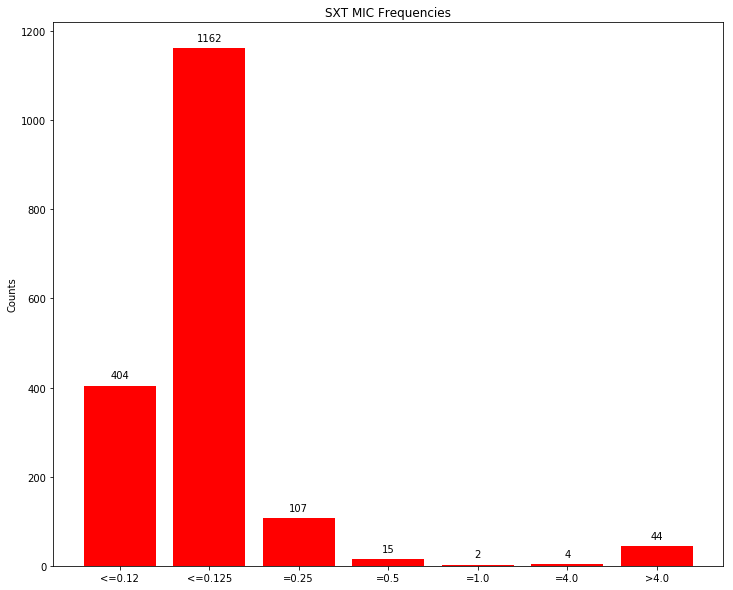

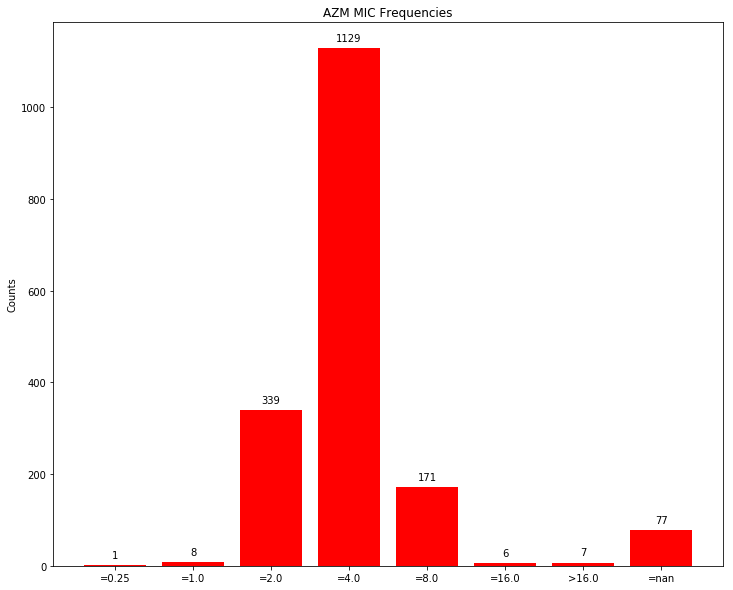

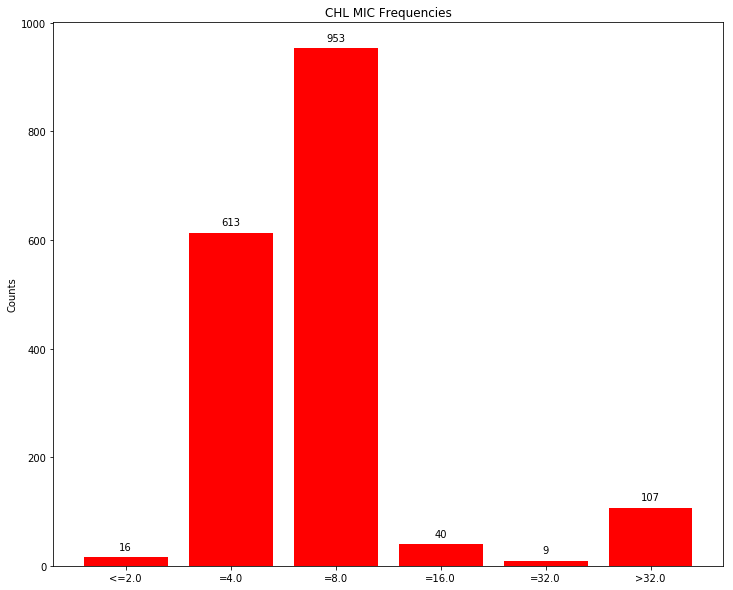

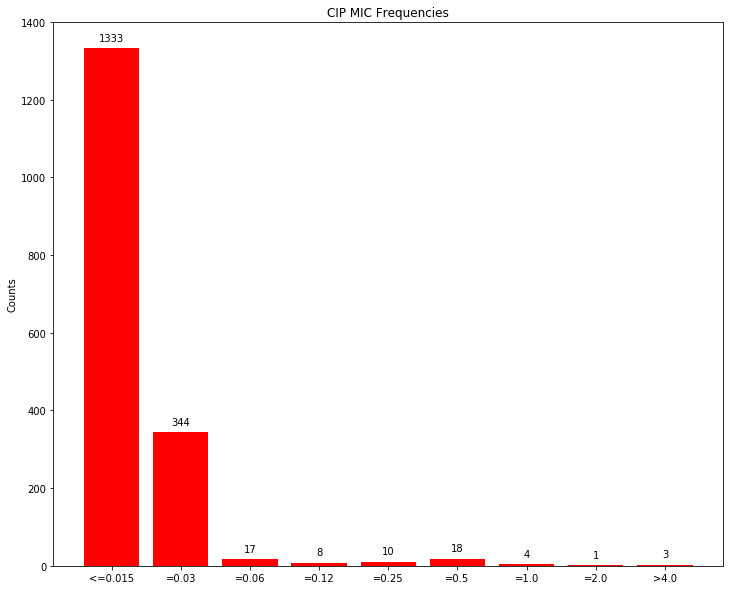

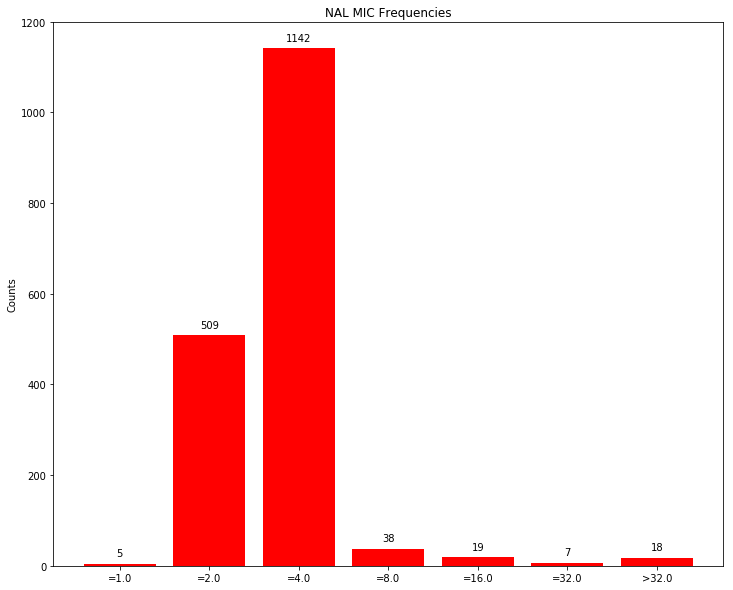

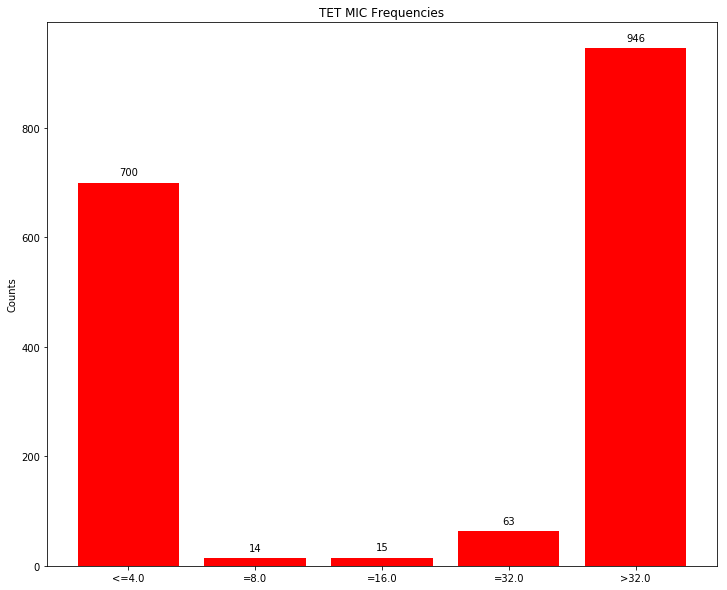

In [141]:
# MIC binning
for drug in list(mic):
    micval = micsign[drug] + mic[drug].map(str)
    vals, counts = np.unique(micval, return_counts=True)
    vals = vals.astype(str)
    modvals = np.char.strip(vals, '>')
    modvals = np.char.strip(modvals,'>=')
    modvals = np.char.strip(modvals, '<')
    modvals = np.char.strip(modvals, '<=')
    modvals = np.char.strip(modvals, '=')
    sortedord = np.argsort(modvals.astype(float))
    vals = vals[sortedord]
    counts = counts[sortedord]
    
    N = len(vals)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.8       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, counts, width, color='r')

    ax.set_ylabel('Counts')
    ax.set_title(drug + ' MIC Frequencies')
    ax.set_xticks(ind)
    ax.set_xticklabels(vals)

    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        _, ymax = plt.ylim()
        bump = ymax * 0.01
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height + bump,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)

    plt.show()

In [142]:
# Save binning for
serotypes, counts = np.unique(meta['SEROTYPE'], return_counts=True)

In [147]:
pd.DataFrame([serotypes, counts]).transpose().to_csv('fda_study.csv',sep="\t", index=False, header=False)